# Biomockup


## Introduction
Biomockup is a programming model inspired on biomolecular evolving interactions.

The traditional programming languages allow the explicit definition of the tasks to be performed, down to the smallest detail. The behavior of the programs is deterministic, the same result will always be obtained if the same program is used with the same input data.

This behavior also has practically no tolerance for programming errors: normally, any coding error leads to an alteration of the functionality for which the program has been built, often even a complete suppression of its functionality, through degraded performance in performance or degraded in terms of the operation logic, which is manifested by the correct execution under some sets of input parameters and incorrect in other cases. We will come back to this topic later.

There is therefore a kind of implicit bijection between coding and function.
This operating paradigm has proved adequate in a broad spectrum of practical applications. Wherever it has been necessary to implement strategies where it is not desirable to code everything (automatic learning by reinforcement in any of its incarnations, for example), the starting point has always been a traditional programming language, completely bijective.

The observation of the behavior of the logical system which seems to scaffold the life, constituted by networks of interaction between proteins, nucleic acids, ligands and residues of all kinds, inspires us to try another approach based in graph theory.

Our goal is to construct a model of *graphs modifying graphs* that encapsulates some of the logic that we find in molecular biology.

## Proteins: bijection rupture.

The first observation is related to the synthesis of proteins. Their function has a lax dependence on the DNA coding sequence of their original gene, so that in many cases, proteins that only reflect a 30% identity percentage also perform the same function.

The correspondence between the function of the protein and the coding in the gene is rather *suprayective*: the same function is obtained from different initial codings.

The cell achieves this result from the three-dimensional conformation of the protein. The function is not directly expressed in the gene, which is not more than a linear structure (1D), but is achieved by restructuring in space (3D) the amino acid sequence that results from the translation, as if in some way there was a *multidimensional information implicit in the gene*.

This multidimensional information, we know that it is determined by the information 1D, but we also know that the reciprocal is not true: the information of the 3D structure can be related to many linear structures of departure.

A more detailed look to protein folding reveals two logical aspects that we want to emulate:
 
1) The folding takes place by the generation of new physical interactions: hydrogen bonds, van der waals forces, disulfure bridges,.... So creating new relations between amino acids.

2) This folding generates a *emergence of function* based in the emergence of surface structures that enable the protein to bind to another molecules. This emergence doesn't takes place into the region of internal interaction, but is a consequence of that internal interaction. So, the *logic* of folding operates in a region, and the function appears in other. This is a crucial difference with the programming paradigm of a IT  human language: the functionality of an algorithm emerges exactly where the code operates. 

*NOTE: we are aware that this comparison between life-IT and human-IT is largely naive. It has to be understood as a mere heuristic analogy, without more pretensions*.


### Interaction model.

Our central idea is to build a linear model of programming blocks (DNA) that undergo a structural transformation to a 2D network. The function will be associated with the appearance of certain motifs within this 2D model. The configuration of this 1D model to 2D will depend on certain predefined interactions between the constituent blocks of our *DNA program*, which we will parameterize in various ways, exploring the possibilities. We will call this parameterization **interaction model (MI)**.

The 2D model will be represented by a graph, which will be generated from structure 1D and MI. We will explore networks with weight between the nodes, the structures based on attractive or repulsive forces and, combined or not with these strategies, the convenience of using hypergraphs and graphs of graphs.

The objective is that the graph is generated automatically from the MI and the linear sequences. The linear sequences are also represented by graphs with nodes connected in a consecutive way.

Well, really the model doesn't speak on dimensions, but on *relations*. A relation between two constituent pieces of DNA (nodes) is represented by an edge of the graph.

The transition from the linear model (regular graph of constant degree 2) is accomplished by the generation of new interactions (creation of new edges between nodes).

An example of interaction model is:

With three types of nodes:

1. N: null generators

2. W: weak generators or short distance generators: generate relation with nodes S,W,N at a distance 3 to 6

3. S: strong generators or long distance generators : generate relation with nodes S at a distance 10 to 15

The computation of the new edges (relations) need be done in a iterative way, because the node distances are modified in every interaction. For instance, the W-generators probably will approach some nodes to the strong generators, otherwise unattainable. It's possible that several models doesn't converge in all the cases.

Note: in this model, we don't take into account, the transcriptional and traslational biological processes, nor their regulation. Our graph DNA is composed yet by amino acid. We only want to emulate the postraslational folding.

### Operation model 

Or external interaction model. Is the model that makes a protein to bin to another molecule, that enables a graph to bind to another graph. So, it's related with the function.

Once the graph has been obtained from the linear sequence and the MI, it will be necessary to explore this graph in search of structures that are associated with predefined functions. This model that associates reasons with functions is called the operation model (MO).

The search for structures in the network will be implemented by existing specialized software or by our own software if we do not find anything that fits our needs.

How is the operation model defined? The functions that are going to be associated with each motif are going to be somewhat irrelevant for this project. We could simply label them to imply that they are different from each other. However, we will try to make some association with practical meaning in order to illustrate better what we are doing.

But by analogy from life the function is attained by the capability of associate a *protein*  with another piece: protein, DNA, ..., or in our logic abstraction, where all this things are networks,  
we need to define an affinity between graphs. In other words, two graphs can bind if both contain some kind of similar subgraphs: k-cores, cliques, ... We don't now at this moment. 

# Project goals

Explore several implementations of MI and MO and analyze the resulting graphs, in an evolutionary context:

1. Identification of emerging structures.

2. Fault tolerance. Ability of the model to admit random mutations (errors) in the sequence of the initial graph, keeping the previously identified emergent structures.

3. Ease to generate new emerging structures (phase changes?).


*Note: this is actually a first piece of an evolution model where fault tolerance allows several versions of the same network to be maintained in a population of graphs, some of them very close to certain phase transitions that would enable the population to generate quickly new functions after changes in environmental restrictions. This evolutionary model could be applied, if we are lucky enough, to the implementation of reinforcement learning strategies and to understand how new functions can emerge surprisingly in highly fault tolerant systems, apparently conservative and thus not prone to functional changes.*

# Example of regular *DNA* graph

['yellow', 'blue', 'red', 'blue', 'red', 'blue']


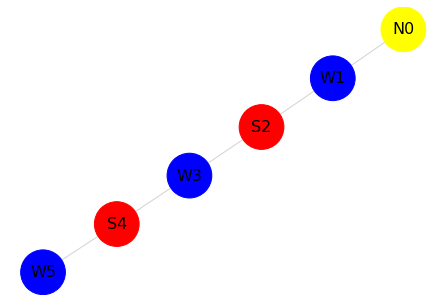

In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline  
import random
import string
# This is a linear regular graph model, the DNA equivalent
G=nx.Graph(name="DNA")
G.add_nodes_from([0,1,2,3,4,5])
G.add_edges_from([(0,1),(1,2),(2,3),(3,4),(4,5)])
labels = {}
labels[0] = 'N0'
labels[1] = 'W1'
labels[2] = 'S2'
labels[3] = 'W3'
labels[4] = 'S4'
labels[5] = 'W5'

colors = []
for label in labels.values():
    if label[0] == "N":
        colors.append("yellow")
    elif label[0] == "S":
        colors.append("red")
    elif label[0] == "W":
        colors.append("blue")

pos = nx.kamada_kawai_layout(G)
print(colors)
nx.draw(G, pos, with_labels = False, node_color = colors, edge_color = "lightgray", node_size=2000)
nx.draw_networkx_labels(G,pos,labels,font_size = 16);

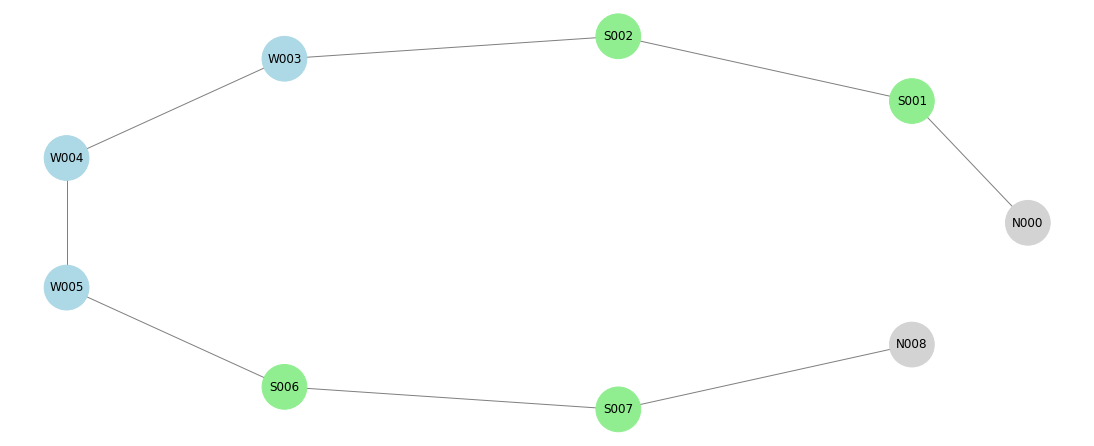

In [134]:
def get_graph_metrics(graph):
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()

def asign_color(node_type):
    """
    Asign color by node type
    """
    if node_type == "N":
        color = "lightgray"
    elif node_type == "S":
        color = "lightgreen"
    elif node_type == "W":
        color = "lightblue"
    else:
        color = "white"
    return color
        
def make_DNA_base_graph(node_string):
    """ 
    Create nonperiodic unidimensional grid according to node string
    Node string is a sequence of N, W and S
    """
    G = nx.Graph(name="DNA")
    i = 0
    labels = {}
    colors = []
    for node_type in node_string:
        if i >= 1:
            G.add_edges_from([(i-1, i)])
        labels[i] = node_type + "{:03d}".format(i)
        colors.append(asign_color(node_type))
        i += 1
    return G, labels, colors

def plot_graph(graph, labels, colors):
    """
    Plot graph
    """
    plt.figure(figsize=(15, 6))
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos=nx.circular_layout(graph), with_labels = False, node_color=colors, edge_color="gray", node_size=2000)
    nx.draw_networkx_labels(graph, pos, labels, font_size = 12);

def plot_subgraph(graph, subgraph, graph_labels, graph_colors):
    """
    Plot subgraph
    """
    subgraph_nodes = subgraph.nodes()
    subgraph_labels = {i:graph_labels[i] for i in subgraph_nodes}
    subgraph_colors = [graph_colors[i] for i in subgraph_nodes]
    plot_graph(subgraph, subgraph_labels, subgraph_colors)
    
graph, labels, colors = make_DNA_base_graph("NSSWWWSSN")
plot_graph(graph, labels, colors)

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
C= 0.0 L= 2.250574712643678 O= 30 30 k_order_size_degree 20 63 4
[1, 2, 3, 4, 9, 10, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
SNSNWSSNNWWSNNSNNSNNNNSNNNNNNN 30
C= 0.0 L= 2.5448275862068965 O= 30 30 k_order_size_degree 13 26 3
{'S': 0, 'W': 1, 'N': 1, 'avg_degree': 6.3, 'min_degree': 4}
{'S': 0, 'W': 1, 'N': 1, 'avg_degree': 4.0, 'min_degree': 3}
has_tolerance 1 1 Dif: 0 Tolerance 0
Tolerance verified on W tolerance 0
has_tolerance 1 1 Dif: 0 Tolerance 0
Tolerance verified on N tolerance 0
has_tolerance 0 0 Dif: 0 Tolerance 0
Tolerance verified on S tolerance 0
has_tolerance 6.3 4.0 Dif: 2.3 Tolerance 1
Tolerance not verified on avg_degree tolerance 1
False


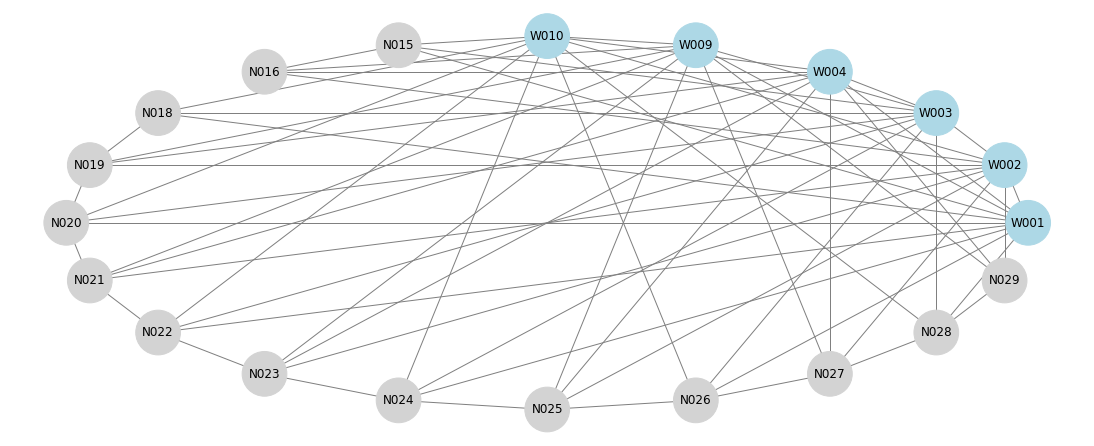

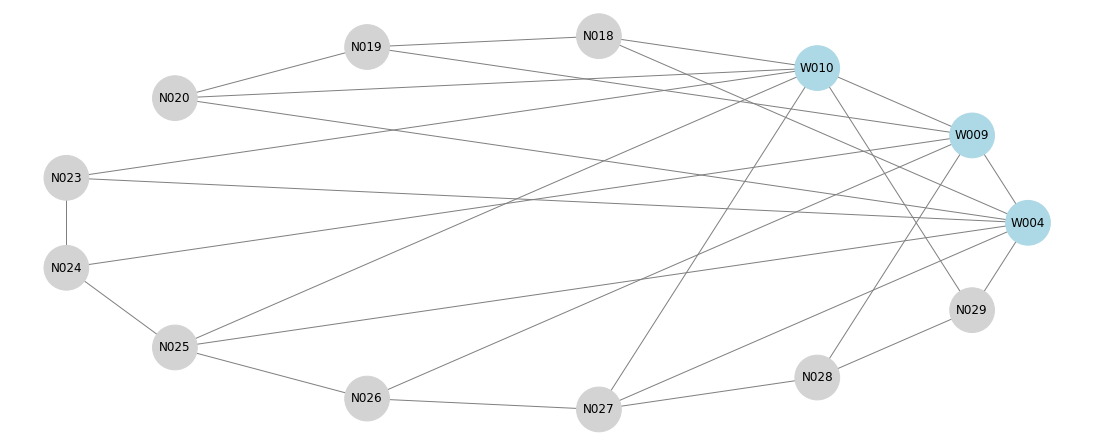

In [230]:
# Constants
NODES = "SWN"
def fold_base_graph(graph, labels, rule):
    """ 
    Create edges according to rules
    """
    edges_added = {}
    rules = rule.split("|")
    for i in range(graph.order()):
        for generator in rules:
            [node_type, node_fin, distance_ini, distance_fin] = generator.split("_")
            distance_ini = int(distance_ini)
            distance_fin = int(distance_fin)
            if labels[i][0] == node_type:
                for j in range(i+1, graph.order()):
                    distance = nx.shortest_path_length(graph, source=i, target=j)
                    if distance <=distance_fin and distance >= distance_ini and labels[j][0] in node_fin:
                        graph.add_edges_from([(i, j)])
                        if node_type in edges_added:
                            edges_added[node_type] += 1
                        else:
                            edges_added[node_type] = 1

def generate_graph(node_string, rule, plot=False):
    """
    generate graph
    """
    graph, labels, colors = make_DNA_base_graph(node_string)
    fold_base_graph(graph, labels, rule=rule)
    if plot:
        plot_graph(graph, labels, colors)
    c, l, o = get_graph_metrics(graph)
    k_core = nx.k_core(graph, k=None, core_number=None)
    k_number = nx.core_number(graph)
    m = max(k_number, key=k_number.get)
    k_core_degree = k_number[m]
    return c, l, o, k_core, k_core_degree, graph, labels, colors

def random_base_structure(probability_string="NWS", length=20):
    """Generate a random base structure of fixed length and composition"""
    return ''.join(random.choice(probability_string) for i in range(length))

def mutate_structure(node_string, mutations=1, probability_string="NWS"):
    """Generate n mutations in node_string"""
    node_string_mutated = list(node_string)
    for mutation in range(mutations):
        mutation_pos = random.randint(0, len(node_string))
        probability_string_filtered = ''.join(c for c in probability_string if c != node_string_mutated[mutation_pos])
        mutation_char = random.choice(probability_string_filtered)
        #print(mutation_pos, probability_string_filtered, node_string_mutated[mutation_pos] , "->", mutation_char)
        node_string_mutated[mutation_pos] = mutation_char
    return ''.join(node_string_mutated)

def has_tolerance(metric, struct1, struct2, tolerance, verbose=True):
    has_tolerance = True
    if metric in struct1 and metric in struct2:
        m = max(struct1[metric], struct2[metric])
        tolerance = round(int(tolerance)*m/100.0)
        if verbose: print("has_tolerance", struct1[metric], struct2[metric], "Dif:", abs(struct1[metric] - struct2[metric]), "Tolerance", tolerance)
        if abs(struct1[metric] - struct2[metric]) > tolerance:
            has_tolerance = False
            if verbose: print("Tolerance not verified on " + metric + " tolerance " + str(tolerance))
        else:
            if verbose: print("Tolerance verified on " + metric + " tolerance " + str(tolerance))
    elif metric not in struct1 and metric not in struct2:
        has_tolerance = True
        if verbose: print("Tolerance verified on " + metric)
    else:
        has_tolerance = False
        if verbose: print("Tolerance not verified on " + metric)
    return has_tolerance

# Similarity
# Number of N plus minus 10 percent, W plus minus 10 percent and S plus minus 10 percent
# degree plus minus 10 percent
# Rule W_10|N_10|S_10
def get_graph_function_structure(graph, labels):
    """
    Obtain the function structure of a graph
    """
    graph_structure = {}
    node_types = [labels[i][0] for i in labels.keys() if i in graph.nodes()]
    for node_type in NODES:
        if node_type in node_types:
            if node_type in graph_structure:
                graph_structure[node_type] += 1
            else:
                graph_structure[node_type] = 1
        else:
            graph_structure[node_type] = 0
    graph_structure["avg_degree"] = sum(degree for _, degree in graph.degree()) / graph.order()
    graph_structure["min_degree"] = min(degree for _, degree in graph.degree())
    return graph_structure


def compare_graphs(tolerances, graph1, graph2, labels1, labels2, verbose=True):
    """ 
    Similarity of graphs
    Based on number of nodes W, N, S, the minimun degree and the overall degree with tolerances
    """
    struct1 = get_graph_function_structure(graph1, labels1)
    struct2 = get_graph_function_structure(graph2, labels2)
    
    for metric in tolerances.keys():
        metric_tolerance = tolerances[metric]
        verify_metric = has_tolerance(metric, struct1, struct2, metric_tolerance, verbose)
        if not verify_metric: return False
    return True


random.seed(20)
node_string = random_base_structure("NNNNNNNNNNWWWSS", 30) 
print(node_string, len(node_string))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_graph(node_string, rule, plot=False)
print("C=", c, "L=", l, "O=", o, graph.order(), "k_order_size_degree", k_core.order(), k_core.size(), k_core_degree)
print(k_core.nodes())
plot_subgraph(graph, k_core, labels, colors)

node_string_mutated = mutate_structure(node_string, mutations=10, probability_string="NWS")
print(node_string_mutated, len(node_string_mutated))
c, l, o, k_core_mutated, k_core_mutated_degree, graph_mutated, labels_mutated, colors = generate_graph(node_string_mutated, rule, plot=False)
print("C=", c, "L=", l, "O=", o, graph_mutated.order(), "k_order_size_degree", k_core_mutated.order(), k_core_mutated.size(), k_core_mutated_degree)
plot_subgraph(graph_mutated, k_core_mutated, labels_mutated, colors)

s = get_graph_function_structure(k_core, labels)
s_mutated = get_graph_function_structure(k_core_mutated, labels)
print(s)
print(s_mutated)
tolerances = {'W':10, 'N':20, 'S':10, 'avg_degree':20, 'min_degree':10}
comp = compare_graphs(tolerances, k_core, k_core_mutated, labels, labels_mutated)
print(comp)

# Mutation cicles

SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN 30
C= 0.0 L= 2.250574712643678 O= 30 30 k_order_size_degree 20 63 4
Initial genoid SWWWWSSNNWWSSNSNNSNNNNNNNNNNNN {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 6.3, 'min_degree': 4}
SWWWWSNNNWWSSNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 6.3, 'min_degree': 4} Consequences False
SWWWWSNNNWSSSNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 5.5, 'min_degree': 4} Consequences False
SWWWWSNNNWWSSNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 6.3, 'min_degree': 4} Consequences False
SWSWWSNNNWWSSNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 5.5, 'min_degree': 4} Consequences False
SWSWWSNNNWWSNNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 5.5, 'min_degree': 4} Consequences False
SWSWWSWNNWWSNNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N': 1, 'avg_degree': 6.363636363636363, 'min_degree': 4} Consequences False
SNSWWSWNNWWSNNSNNSNNNNNNNNNNNN Function {'S': 0, 'W': 1, 'N'

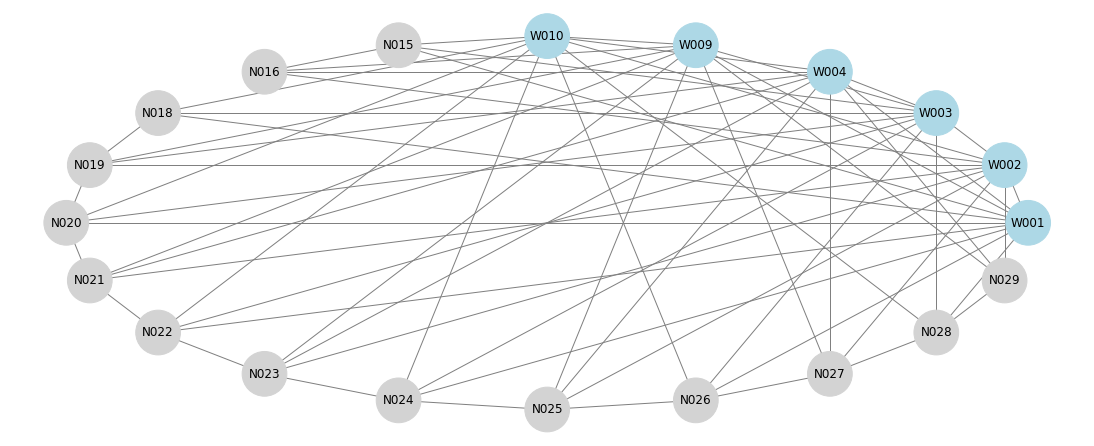

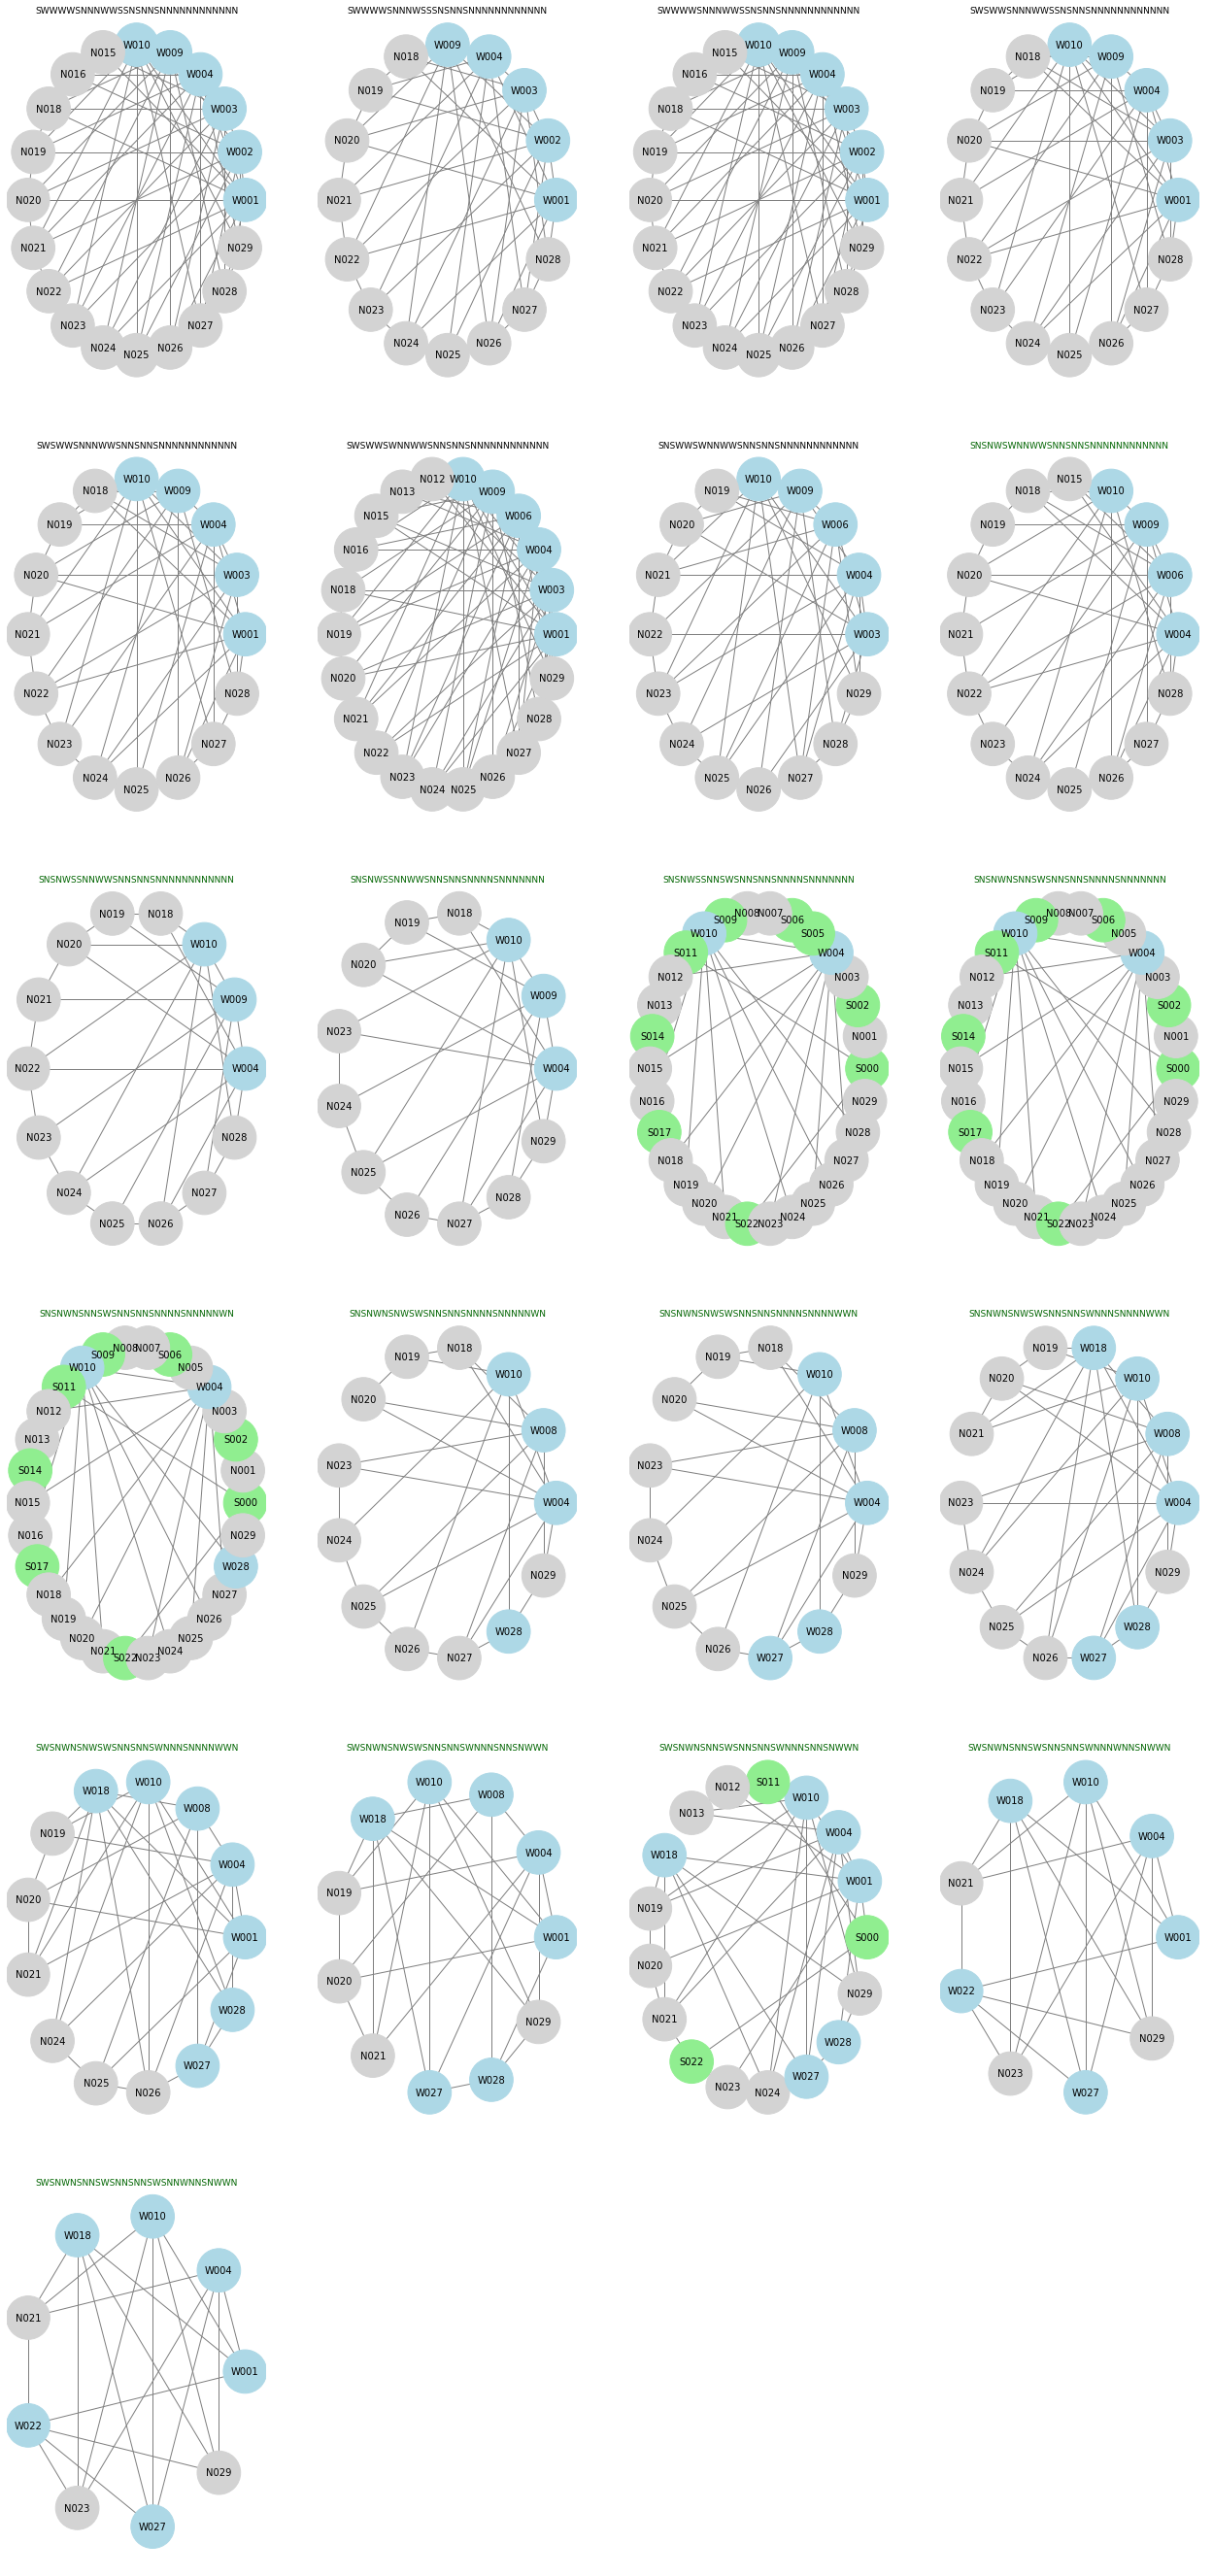

In [237]:
def plot_graph2(graph, labels, colors, axis, title, title_color):
    """
    Plot graph
    """
    plt.sca(axis)
    axis.set_axis_off()
    pos = nx.circular_layout(graph)
    nx.draw(graph, pos=nx.circular_layout(graph), ax=axis, with_labels = False, node_color=colors, edge_color="gray", node_size=2000)
    nx.draw_networkx_labels(graph, pos, labels, ax=axis, font_size=10)
    plt.title(title, color=title_color, fontsize=9)

def plot_subgraph2(graph, subgraph, graph_labels, graph_colors, axis, title, title_color):
    """
    Plot subgraph
    """
    subgraph_nodes = subgraph.nodes()
    subgraph_labels = {i:graph_labels[i] for i in subgraph_nodes}
    subgraph_colors = [graph_colors[i] for i in subgraph_nodes]
    plot_graph2(subgraph, subgraph_labels, subgraph_colors, axis, title, title_color)
    
def mutation_cicle(graph, k_core, node_string, labels, colors, tolerances, mutation_step, mutations_count, probability_string="NWS"):
    """
    """
    assert mutations_count >= 1, "Parameter mutations_count must be greater than 0"
    plot_row = 4
    mutations = {}
    node_string_mutated = node_string
    print("Initial genoid", node_string, get_graph_function_structure(k_core, labels))
    row_grid = int(mutations_count/plot_row) + 1
    if mutations_count%plot_row == 0: row_grid -= 1
    #print(row_grid)
    plt.axis('off')
    fig, axs = plt.subplots(row_grid, plot_row, figsize=(22, 8*row_grid))
    #print(axs)
    for mutation in range(mutations_count):
        node_string_mutated = mutate_structure(node_string_mutated, mutations=mutation_step, probability_string=probability_string)
        c, l, o, k_core_mutated, k_core_mutated_degree, graph_mutated, labels_mutated, colors = generate_graph(node_string_mutated, rule, plot=False)
        if row_grid == 1:
            axis = axs[mutation]
        else:
            axis = axs[int(mutation/plot_row), int(mutation%plot_row)]
        s_mutated = get_graph_function_structure(k_core_mutated, labels_mutated)
        consequences = not compare_graphs(tolerances, k_core, k_core_mutated, labels, labels_mutated, verbose=False)
        if consequences: color = "darkgreen"
        else: color = "black"
        plot_subgraph2(graph_mutated, k_core_mutated, labels_mutated, colors, axis, node_string_mutated, color)
        print(node_string_mutated, "Function", s_mutated, "Consequences", consequences)
    for i in range(int(mutations_count%plot_row), plot_row):
        print("Row", row_grid - 1, i)
        if row_grid == 1:
            axis = axs[i]
        else:
            axis = axs[row_grid - 1, i]
        print("SSS", axis)
        axis.set_axis_off()
    plt.show()
    
random.seed(20)
node_string = random_base_structure("NNNNNNNNNNWWWSS", 30) 
print(node_string, len(node_string))
rule = "W_WN_3_5|S_S_10_30"
c, l, o, k_core, k_core_degree, graph, labels, colors = generate_graph(node_string, rule, plot=False)
print("C=", c, "L=", l, "O=", o, graph.order(), "k_order_size_degree", k_core.order(), k_core.size(), k_core_degree)
plot_subgraph(graph, k_core, labels, colors)

tolerances = {'W':10, 'N':10, 'S':10, 'avg_degree':10, 'min_degree':10}
probability_string = "NWS"
mutation_cicle(graph, k_core, node_string, labels, colors, tolerances,
               mutation_step=1, mutations_count=21, probability_string=probability_string)

# Outputs

In [46]:
%%bash
#cd /Users/nandoide/Desktop/uni/STRBI.practical
jupyter nbconvert --to=latex --template=~/report.tplx Biomockup.ipynb 1> /dev/null
pdflatex -shell-escape Biomockup 1> /dev/null
jupyter nbconvert --to html_with_toclenvs Biomockup.ipynb 1> /dev/null

[NbConvertApp] Converting notebook Biomockup.ipynb to latex
[NbConvertApp] Support files will be in Biomockup_files/
[NbConvertApp] Making directory Biomockup_files
[NbConvertApp] Writing 35551 bytes to Biomockup.tex
[NbConvertApp] Converting notebook Biomockup.ipynb to html_with_toclenvs
[NbConvertApp] Writing 310486 bytes to Biomockup.html
